# Exoplanet Analysis

## STAT 107 Final Project
Written by: **Guilherme Busato**, NetID: **gbusato2**

**The All Exoplanets Dataset** (https://www.kaggle.com/shivamb/all-exoplanets-dataset):
- "The Exoplanet dataset consists of known exoplanets that were discovered using a variety of methods, and many have been detected using multiple methods. The data was produced by the NASA Exoplanet Archive (https://exoplanetarchive.ipac.caltech.edu/)."


In [8]:
# Importing libraries...

import pandas as pd
from scipy import stats

# Reading Datasets...

exo_df = pd.read_csv("all_exoplanets_2021.csv")
print("The exoplanet dataset has a total of", exo_df.shape[0], "rows, and", 
      exo_df.shape[1], "columns, totalling", exo_df.shape[0] * exo_df.shape[1], "entries.", end="\n\n")
print("Its columns are:")
for i in exo_df: print(i, end=", ")

The exoplanet dataset has a total of 4575 rows, and 23 columns, totalling 105225 entries.

Its columns are:
No., Planet Name, Planet Host, Num Stars, Num Planets, Discovery Method, Discovery Year, Discovery Facility, Orbital Period Days, Orbit Semi-Major Axis, Mass, Eccentricity, Insolation Flux, Equilibrium Temperature, Spectral Type, Stellar Effective Temperature, Stellar Radius, Stellar Mass, Stellar Metallicity, Stellar Metallicity Ratio, Stellar Surface Gravity, Distance, Gaia Magnitude, 

Out of 63 facilities, the top 10 by number of exoplanets discovered are:
1 : Kepler , 4562
2 : K2 , 870
3 : La Silla Observatory , 582
4 : Multiple Observatories , 377
5 : Transiting Exoplanet Survey Satellite (TESS) , 346
6 : W. M. Keck Observatory , 312
7 : SuperWASP , 122
8 : Haute-Provence Observatory , 98
9 : OGLE , 82
10 : HATNet , 71


<AxesSubplot:xlabel='Discovery Facility'>

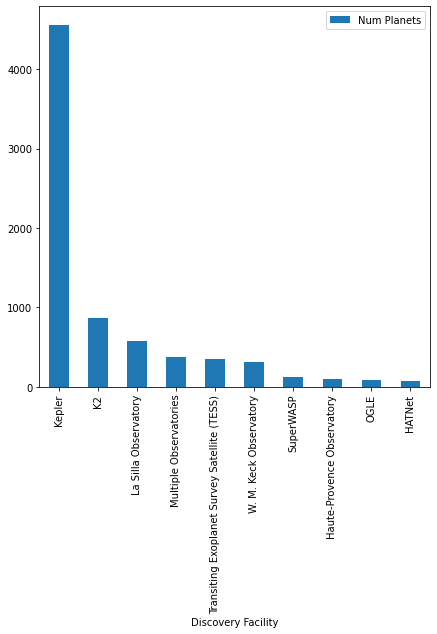

In [10]:
# Finding the facilities that discovered the greatest number of planets...

gpby_facility_agg_sum = exo_df.groupby("Discovery Facility").agg("sum").reset_index()
gpby_facility_agg_sum = gpby_facility_agg_sum[["Discovery Facility", "Num Planets"]]
top_10_facilities_by_num_planets = gpby_facility_agg_sum.nlargest(10, "Num Planets")

print("Out of", gpby_facility_agg_sum.shape[0], "facilities, the top 10 by number of exoplanets discovered are:")
j = 1
for entry in top_10_facilities_by_num_planets.values:
  print(j, ":", entry[0], ",", entry[1])
  j += 1
top_10_facilities_by_num_planets.plot.bar("Discovery Facility", figsize=(7, 7))

The 11 discovert methods, ranked by number of exoplanets discovered are:
1 : Transit , 6208
2 : Radial Velocity , 1653
3 : Microlensing , 128
4 : Imaging , 73
5 : Transit Timing Variations , 59
6 : Eclipse Timing Variations , 24
7 : Orbital Brightness Modulation , 17
8 : Pulsar Timing , 13
9 : Pulsation Timing Variations , 2
10 : Astrometry , 1
11 : Disk Kinematics , 1


<AxesSubplot:xlabel='Discovery Method'>

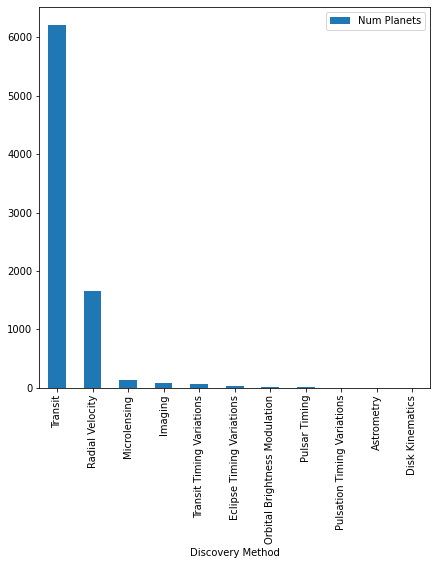

In [4]:
# Finding the most common method of planet identification...

gpby_discovery_method_agg_sum = exo_df.groupby("Discovery Method").agg("sum").reset_index()
gpby_discovery_method_agg_sum = gpby_discovery_method_agg_sum[["Discovery Method", "Num Planets"]]
gpby_discovery_method_agg_sum = gpby_discovery_method_agg_sum.sort_values("Num Planets", ascending=False)

print("The", gpby_discovery_method_agg_sum.shape[0], "discovert methods, ranked by number of exoplanets discovered are:")
j = 1
for entry in gpby_discovery_method_agg_sum.values:
  print(j, ":", entry[0], ",", entry[1])
  j += 1
gpby_discovery_method_agg_sum.plot.bar("Discovery Method", figsize=(7, 7))

In [5]:
# Finding the range of distance of planets discovered...

min_distance = exo_df["Distance"].min()
max_distance = exo_df["Distance"].max()

print("The closest exoplanet discovered is ", round(min_distance, 4), "parsecs away, that is",
      round(min_distance*3.26156378, 4), "lightyears! Or", min_distance*19174000000000, "miles!")
print("The furthest exoplanet discovered is ", round(max_distance, 4), "parsecs away, that is",
      round(max_distance*3.26156378, 4), "lightyears! Or", max_distance*19174000000000, "miles!\n")

print("The Parker Solar Probe (https://en.wikipedia.org/wiki/Parker_Solar_Probe) is the fastest spacecraft ever built.")
print("It reached a speed of 365,000mph.")
print("Assuming we could build a spaceship that could travel at that speed indefinitely, it would take:")
print((min_distance*3.26156378)/0.0005, "years to reach the closest exoplanet discovered.")
print((max_distance*3.26156378)/0.0005, "years to reach the furthest exoplanet discovered.")

The closest exoplanet discovered is  1.3012 parsecs away, that is 4.2439 lightyears! Or 24949017060000.0 miles!
The closest exoplanet discovered is  8200.0 parsecs away, thats 26744.823 lightyears! Or 1.572268e+17 miles!

The Parker Solar Probe (https://en.wikipedia.org/wiki/Parker_Solar_Probe) is the fastest spacecraft ever built.
It reached a speed of 365,000mph.
Assuming we could build a spaceship that could travel at that speed indefinitely, it would take:
8487.8283497964 years to reach the closest exoplanet discovered.
53489645.992 years to reach the furthest exoplanet discovered.


<AxesSubplot:xlabel='Discovery Year'>

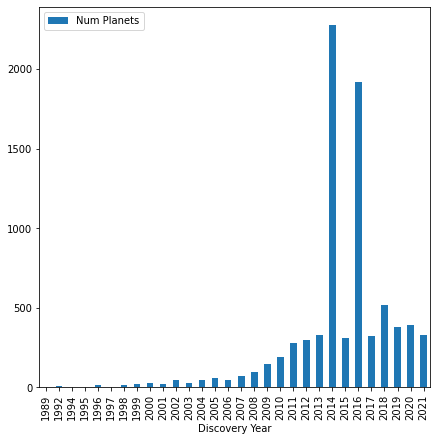

In [6]:
# Visualizing discoveries over the years...

gpby_discovery_year_agg_sum = exo_df.groupby("Discovery Year").agg("sum").reset_index()
gpby_discovery_year_agg_sum = gpby_discovery_year_agg_sum[["Discovery Year", "Num Planets"]]
years = gpby_discovery_year_agg_sum["Discovery Year"].max() - gpby_discovery_year_agg_sum["Discovery Year"].min()

gpby_discovery_year_agg_sum.plot.bar("Discovery Year", figsize=(7, 7))

In [7]:
# Which planets could potencially have life? (sort of...)

life_potential_temperature = exo_df[ (exo_df["Equilibrium Temperature"] >= 248.15) & (exo_df["Equilibrium Temperature"] <= 395.15) ]

life_potential_temperature = life_potential_temperature[["Planet Name", "Equilibrium Temperature"]]

print("Based on temperature alone, life has been observed in temperature between -15C and 122C, that is 248.15K and 395.15K")

eq_temperature = exo_df["Equilibrium Temperature"].dropna()
print(life_potential_temperature["Equilibrium Temperature"].count(), "out of", eq_temperature.count(),
      "planets fit the windows of temperature that could possibly support life.")
print("That is:", round(life_potential_temperature["Equilibrium Temperature"].count() / eq_temperature.count()*100, 4),
      "% of the planets accounted for in the data.")
print("This means that on average, around 1 out of",
      round(1/(life_potential_temperature["Equilibrium Temperature"].count() / eq_temperature.count()), 4), " planets will be in that window.")

print("The 10 planets with an equilibrium temperature closes to the Earth (255K) are:")

life_potential_temperature["diff"] = abs(life_potential_temperature["Equilibrium Temperature"] - 255)
top_10_similar_temperature = life_potential_temperature.nsmallest(10, "diff")
j = 1
for i in top_10_similar_temperature.values:
  print(j, ":", i[0], ", Eq temp:", i[1], ", difference:", i[2])
  j += 1

Based on temperature alone, life has been observed in temperature between -15C and 122C, that is 248.15K and 395.15K
63 out of 925 planets fit the windows of temperature that could possibly support life.
That is: 6.8108 % of the planets accounted for in the data.
This means that on average, around 1 out of 14.6825  planets will be in that window.
The 10 planets with an equilibrium temperature closes to the Earth (255K) are:
1 : Kepler-1704 b , Eq temp: 254.0 , difference: 1.0
2 : TOI-2257 b , Eq temp: 256.0 , difference: 1.0
3 : Kepler-539 c , Eq temp: 253.0 , difference: 2.0
4 : HD 109286 b , Eq temp: 259.0 , difference: 4.0
5 : HD 27969 b , Eq temp: 261.0 , difference: 6.0
6 : Kepler-22 b , Eq temp: 262.0 , difference: 7.0
7 : Kepler-452 b , Eq temp: 265.0 , difference: 10.0
8 : K2-332 b , Eq temp: 266.0 , difference: 11.0
9 : Kepler-1652 b , Eq temp: 268.0 , difference: 13.0
10 : TOI-700 d , Eq temp: 269.0 , difference: 14.0
